# Altair Testdrive
> Online Tooltips with classic image savings

- toc:false
- badges: true
- comments: false
- author: Andreas Trawöger
- categories: [arch]
- image: images/altair.png
- permalink: altair-testdrive

In [ ]:
import os
import pandas as pd
import altair as alt
from altair_saver import save
from IPython.display import Image

movies = 'https://vega.github.io/vega-datasets/data/movies.json'
mpaa = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'Not Rated']
image = r"../images/altair.png"

In [ ]:
df = pd.read_json(movies) # load movies data
df.columns = [x.replace(' ', '_') for x in df.columns.values]
genres = df['Major_Genre'].unique() # get unique field values
genres = list(filter(lambda d: d is not None, genres)) # filter out None values
genres.sort() # sort alphabetically

In [ ]:
# single-value selection over [Major_Genre, MPAA_Rating] pairs
# use specific hard-wired values as the initial selected values
selection = alt.selection_single(
    name='Select',
    fields=['Major_Genre', 'MPAA_Rating'],
    init={'Major_Genre': 'Drama', 'MPAA_Rating': 'R'},
    bind={'Major_Genre': alt.binding_select(options=genres), 'MPAA_Rating': alt.binding_radio(options=mpaa)}
)
  
# scatter plot, modify opacity based on selection
alt.Chart(df).mark_circle().add_selection(
    selection
).encode(
    x='Rotten_Tomatoes_Rating:Q',
    y='IMDB_Rating:Q',
    tooltip='Title:N',
    opacity=alt.condition(selection, alt.value(0.75), alt.value(0.05))
)

In [ ]:
chart = alt.Chart(df).mark_circle().add_selection(
    alt.selection_interval(bind='scales', encodings=['x'])
).encode(
    alt.X('Rotten_Tomatoes_Rating', type='quantitative'),
    alt.Y('IMDB_Rating', type='quantitative', axis=alt.Axis(minExtent=30)),
#     y=alt.Y('IMDB_Rating:Q', ), # use min extent to stabilize axis title placement
    tooltip=['Title:N', 'Release_Date:N', 'IMDB_Rating:Q', 'Rotten_Tomatoes_Rating:Q']
).properties(
    width=500,
    height=400
)

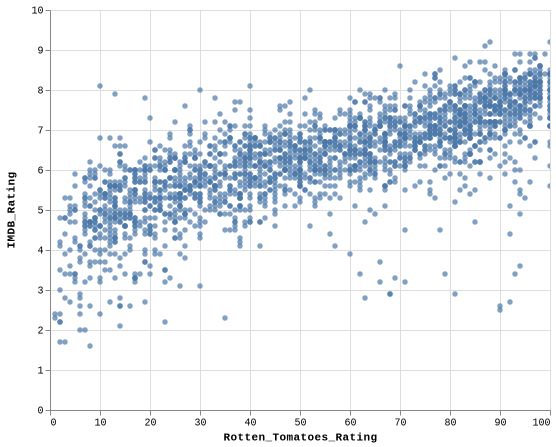

In [5]:
if os.path.exists(image):
  os.remove(image)
alt.renderers.enable('altair_saver', fmts=['vega-lite','png'])
save(chart, image)
Image(filename=image)